# Code of the K=4 armed bandit TestBed
### @Author: Daniel Vallejo Aldana

In [3]:
import numpy as np
import random
from scipy.stats import bernoulli as bl
import matplotlib.pyplot as plt

In [5]:
q_values=np.random.uniform(low=-2, high=2, size=4)
q_values=q_values.tolist()
aval={}
for i,v in enumerate(q_values):
    aval[i+1]=v
print(aval)

{1: 0.858794535262962, 2: -1.1369042945176497, 3: 0.25126712575774857, 4: 1.0354863562839842}


In [6]:
def reward(action,daction):
    return np.random.normal(loc=daction[action],scale=1)

def return_action(Q,N):
    ind=Q.tolist().index(max(Q))
    N[ind]+=1
    return ind+1

In [7]:
def epsilon_greedy(epsilon=0,qvals=q_values,daction=aval,time_steps=300,seed=10):
    #epsilon value is set to 0 by default, just taking greedy actions
    np.random.seed(seed)
    random.seed(seed)
    Q=np.zeros_like(np.asarray(qvals))
    N=np.zeros_like(np.asarray(qvals))
    rewards=[]
    rewards.append(0)
    for step in range(time_steps):
        #epsilon greedy update
        option=bl.rvs(1-epsilon)
        if option:
            #Geedy action
            action=return_action(Q,N)
            R=reward(action,daction)
            rewards.append(R)
            Q[action-1]=Q[action-1]+(1/N[action-1])*(R-Q[action-1]) #Update equation
        else:
            #Select action randomly
            action=random.randrange(1,len(qvals))
            R=reward(action,daction)
            N[action-1]+=1
            rewards.append(R)
            Q[action-1]=Q[action-1]+(1/N[action-1])*(R-Q[action-1]) #Update equation
    return Q,rewards

In [16]:
average_dist=np.zeros(801)
colores=['red','blue','green','magenta']
samples=2000
for i in range(samples):
    Qv,Re=epsilon_greedy(epsilon=0.1,seed=i+1,time_steps=800)
    average_dist=average_dist+np.asarray(Re)
average_dist=average_dist/samples

In [17]:
average_dist2=np.zeros(801)
samples=2000
for i in range(samples):
    Qv,Re=epsilon_greedy(epsilon=0.01,seed=i+1,time_steps=800)
    average_dist2=average_dist2+np.asarray(Re)
average_dist2=average_dist2/samples

(0.0, 2.0)

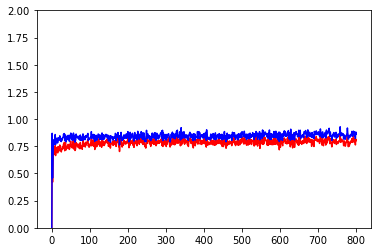

In [18]:
plt.plot(average_dist,color='red')
plt.plot(average_dist2,color='blue')
plt.ylim(0,2)